In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('seaborn')

In [2]:
users = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')

In [3]:
print (len(anime))
print (anime.rating)
anime.head()

12294
0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
5        9.15
6        9.13
7        9.11
8        9.10
9        9.11
10       9.06
11       9.05
12       9.04
13       8.98
14       8.93
15       8.93
16       8.92
17       8.88
18       8.84
19       8.83
20       8.83
21       8.83
22       8.82
23       8.82
24       8.81
25       8.81
26       8.80
27       8.80
28       8.78
29       8.78
         ... 
12264    6.42
12265     NaN
12266    5.43
12267    4.11
12268    2.86
12269    4.08
12270    3.00
12271    5.20
12272    4.14
12273    4.00
12274     NaN
12275    3.14
12276    4.00
12277    4.66
12278    3.61
12279     NaN
12280     NaN
12281    4.53
12282     NaN
12283    4.95
12284    4.45
12285     NaN
12286    4.67
12287    4.33
12288    4.37
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, dtype: float64


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print (len(users))
users.head()


7813737


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


So we have two pandas data frames. In the first, we have information regarding a particular anime. The information here speaks for itself. In the second data frame, we have the actual ratings for a given user/ anime pair. Ratings range from 1 to 10, with -1 signifying a completed but unrated movie.

We can see there are 12294 total anime and 7.8 million user/ rating pairs. The first thing we want to do is remove all ratings that are "-1" as they don't provide us useful information on ratings. There are also some anime with NaNs for scores. We'll want to remove those, but let's wait a second on that.

In [5]:
users.drop(users[users.rating == -1].index, inplace=True)

print (len(users))
users.head()

6337241


,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


Neat. We trimmed down about 1.5 million data points. But that's still too many. Let's, for the purposes of this analysis, focus only on TV shows. We're going to need a list of anime_ids corresponding to non-TV shows. Let's kill two birds with one stone and include anime that have null ratings for whatever reason.

In [6]:
bad_ids = anime.anime_id[(anime.type != 'TV') | (anime.rating.isnull())]
users.drop(users[users.anime_id.map(lambda x: x in bad_ids)].index, inplace=True)
anime.drop(anime[(anime.type != 'TV') | (anime.rating.isnull())].index, inplace=True)

print(len(users))
print(len(anime))

3594754
3671


Neat. We cut down to 3.6 million user/anime pairs, with 3671 unique TV titles. Note that we cut down about 75% of anime entries, yet the number of user/anime pairs cut down by less than 50%. Those titles (movies, specials, OVAs) obviously had less interest, so our resulting data is denser. That's good for our recommender systems. 

We'll want to wrap this code in a pre-processing function in a package down the line, but for this exploratory analysis, I'll leave it as such.

Let's visualize the data. Let's do some basic stuff first.

min: 2.670000; max: 9.600000
mean: 6.902299; median: 6.940000


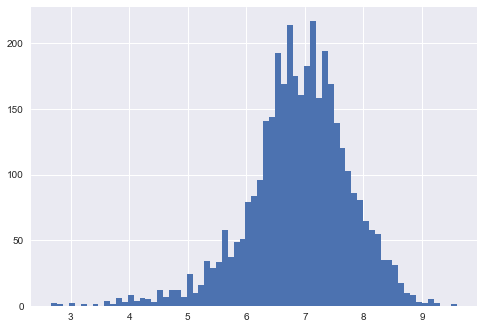

In [129]:
print ("min: %f; max: %f" % (anime.rating.min(), anime.rating.max()))
print ("mean: %f; median: %f" % (anime.rating.mean(axis=0), anime.rating.median(axis=0)))
nBins = int((anime.rating.max()-anime.rating.min())/0.1) #nBins such that each bin corresponds to a 0.1 range
anime.rating.hist(bins=nBins) 



The data is skewed left, but not significantly so. The mean and median are very close to each other, at about 6.9. We also see spikes at the bins corresponding to [6.7, 6.8) and [7.1, 7.2), for whatever reason.

Can we run the same analysis but on a genre-by-genre basis? First, we need to get a list of genres. This probably isn't the most efficient way to do it. 

In [122]:
genres = anime.genre.apply(lambda x: str(x).split(","))
genres2 = genres.apply(pd.Series)
all_genres = []
for i in range(len(genres2.columns)):
    all_genres += map(lambda s: str(s).strip(), list(genres2[i].unique()))
all_genres = list(np.unique(all_genres))
all_genres.remove('nan')

In [130]:
for genre in all_genres:
    ratings = anime.rating[genres.map(lambda x: 'Action' in x)]

1        9.26
2        9.25
4        9.16
6        9.13
9        9.11
12       9.04
13       8.98
19       8.83
22       8.82
23       8.82
29       8.78
36       8.73
42       8.68
64       8.60
67       8.59
74       8.58
75       8.57
76       8.57
78       8.57
82       8.55
84       8.54
86       8.54
94       8.51
95       8.51
98       8.50
101      8.50
104      8.50
106      8.49
112      8.48
113      8.48
         ... 
10105    7.16
10108    7.10
10112    6.64
10185    7.19
10234    6.25
10240    5.67
10278    5.29
10303    6.11
10304    5.75
10398    7.33
10460    4.00
10492    5.60
10525    5.90
10593    6.57
10631    6.27
10634    6.60
10637    6.22
10643    6.08
10712    6.56
10747    6.73
10751    6.32
10754    5.94
10768    5.86
10788    7.15
10816    5.45
10859    6.49
10862    6.36
10872    6.43
10873    5.23
10882    7.17
Name: rating, dtype: float64

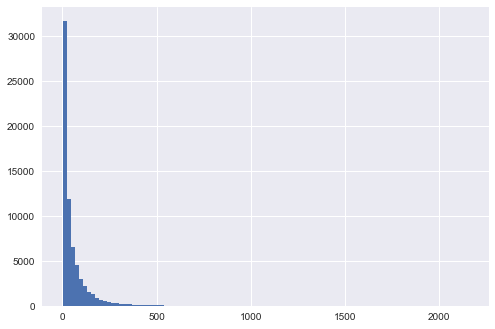

In [8]:
users.user_id.value_counts().hist(bins=100)

So it looks like an exponential curve, but the plot is too scaled out. Let's drop out users who have seen more than 250 anime for the sake of visualization. 

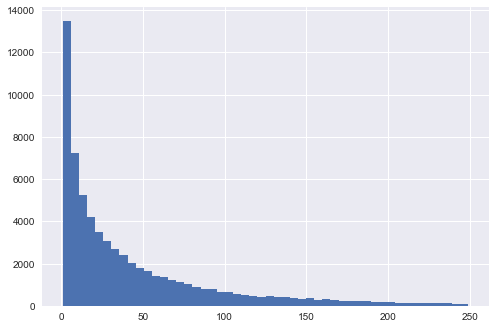

In [9]:
vc = users.user_id.value_counts()
vc = vc[vc.map(lambda x: x < 250)]
vc.hist(bins=50)

The exponential decay of how many anime the a user has seen is pretty clear from this chart. As noted before, recommender systems work best with relatively dense data. We might find it useful, then, to remove users that have seen fewer than a certain amount of anime. This will be a hyper-parameter when we fit recommender systems. Let's go ahead and remove users who have seen fewer than 10 anime, for now.

In [10]:
vc = users.user_id.value_counts()
low_ratings = vc[vc.map(lambda x: x < 10)].index
users.drop(users[users.user_id.map(lambda x: x in low_ratings)].index, inplace=True)
len(users)
users.head()

,user_id,anime_id,rating
156,3,20,8
159,3,199,10
164,3,552,7
168,3,1122,7
170,3,1292,6


We lose only about 80,000 user/anime pairs, but now our dataset is more robust. The number 10 was chosen arbitrarily, of course. When we build a recommender system, we can change it based on validation error or on computational limitations.